In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

data_path = "data/train_pair_1w.json"
s1 = "sentence1"
s2 = "sentence2"
thresholds = np.arange(0, 1.05, 0.05)


pairs = []
corpus = []
labels = []
positive = 0
with open(data_path) as f:
    for line in f.readlines():
        pair = json.loads(line)
        pairs.append(pair)
        corpus += [pair[s1], pair[s2]]
        labels.append(int(pair['label']))
        positive += int(pair['label'])
        
            
print(pairs[0])        
print(f"positive: {positive}, negative: {len(pairs)-positive}")

{'sentence1': '找一部小时候的动画片', 'sentence2': '求一部小时候的动画片。谢了', 'label': '1'}
positive: 3999, negative: 6001


In [2]:
sum(labels)

3999

# Evaluation Method


In [ ]:
class Evaluator:
    def __init__(self):
        

# tf-idf

In [165]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import jieba


class TFIDF:
    def __init__(self):
        # 创建TF-IDF向量化器
        self.vectorizer = TfidfVectorizer()
        
    def segmentation(self, sentences):
        result = [list(jieba.cut(s, cut_all=False)) for s in sentences]
#         print(result)
        return result
    
    def fit(self, corpus):
        self.vectorizer = self.vectorizer.fit(corpus)

    def get_similarity(self, sentences):
        # 分词

        sentences = self.segmentation(sentences)
        sentences = [" ".join(s) for s in sentences]
        
        # 将句子转换为TF-IDF向量
        tfidf_matrix = self.vectorizer.transform(sentences)
        # 计算两个句子的相似度

        similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
        # 返回相似度
        return round(similarity[0][0],4)


In [166]:
def evaluate(evaluator):
    correct = 0
    scores = []
    for i, pair in enumerate(pairs):
#         print(f"pair {i}: {pair['sentence1']}, {pair['sentence2']}")
        label = pair['label']
        sentences = [pair['sentence1'], pair['sentence2']]
        
        similarity_score = evaluator.get_similarity(sentences)
        
        scores.append(similarity_score)

    return scores

In [167]:
tfidf = TFIDF()

tfidf.fit(corpus)



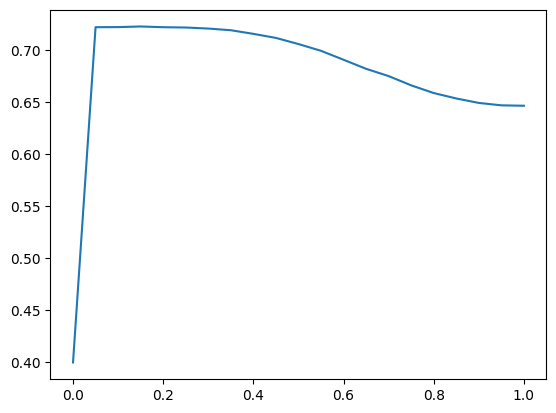

In [180]:
import pandas as pd

scores = evaluate(tfidf, t=0.5)

results = pd.DataFrame({'score': scores, 'label': labels})
accuracy = []
for t in thresholds:
    t = round(t, 2)
    col_name = f't: {t}'
    results[col_name] = results['score'].apply(lambda x: x >= t)
    results[col_name] = results[col_name] == results['label']
    accuracy.append(sum(results[col_name])/ len(results))
    
plt.plot(thresholds, accuracy)
plt.show()


# n-gram

In [172]:
class NGram:
    def __init__(self, n):
        self.n = n
        
    def segmentation(self, sentences):
        result = [list(jieba.cut(s, cut_all=False)) for s in sentences]
        return result        
        
    def get_similarity(self, sentences):
        sentences = self.segmentation(sentences)
        sentences = [" ".join(s) for s in sentences]
        n_grams = [self.generate_ngrams(s, self.n)  for s in sentences]
        similarity = self.calculate_similarity(n_grams[0], n_grams[1])
        return similarity

    def generate_ngrams(self, text, n):
        """生成句子的N-gram表示"""
        words = text.split(" ")  # 假设句子已经分词
        ngrams = set()
        for i in range(len(words) - n + 1):
            ngram = ' '.join(words[i:i + n])
            ngrams.add(ngram)
        return ngrams

    def calculate_similarity(self, ngrams1, ngrams2):
        """计算两个N-gram集合的相似度"""
        intersection = ngrams1.intersection(ngrams2)
        union = ngrams1.union(ngrams2)
        similarity_score = len(intersection) / len(union) if union else 0
        return similarity_score

In [173]:
ngram = NGram(3)

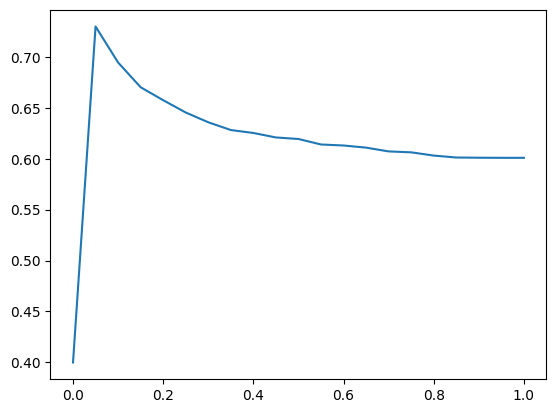

In [177]:
import pandas as pd

scores = evaluate(ngram, t=0.5)

results = pd.DataFrame({'score': scores, 'label': labels})
accuracy = []
for t in thresholds:
    t = round(t, 2)
    col_name = f't: {t}'
    results[col_name] = results['score'].apply(lambda x: x >= t)
    results[col_name] = results[col_name] == results['label']
    accuracy.append(sum(results[col_name])/len(results))
    
plt.plot(thresholds, accuracy)
plt.show()

# 